<a href="https://colab.research.google.com/github/dodosdel/projects/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data - data

In [11]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# data importing
data = pd.read_csv("/content/gld_price_data.csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# number of rows and columns
data.shape

(2290, 6)

In [ ]:
# general info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking data has null values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

## Correlation

In [10]:
correlation = data.drop(columns=['Date']).corr()

<Axes: >

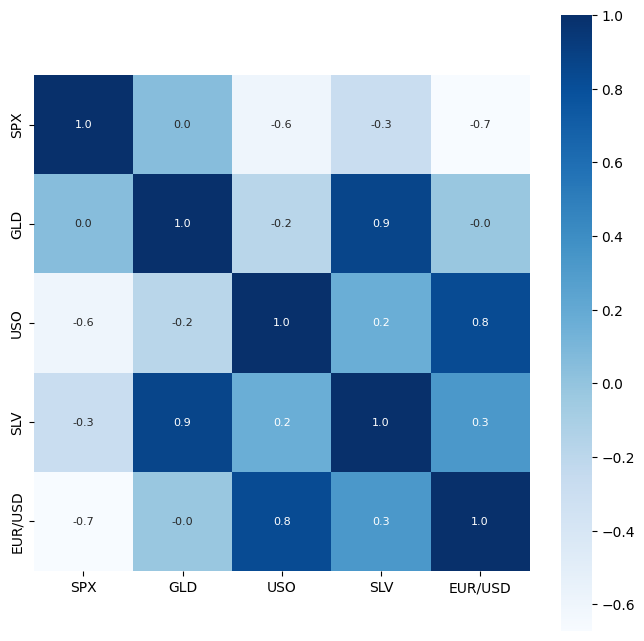

In [12]:
# constructing heatmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

In [13]:
# gold correlation to other values
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


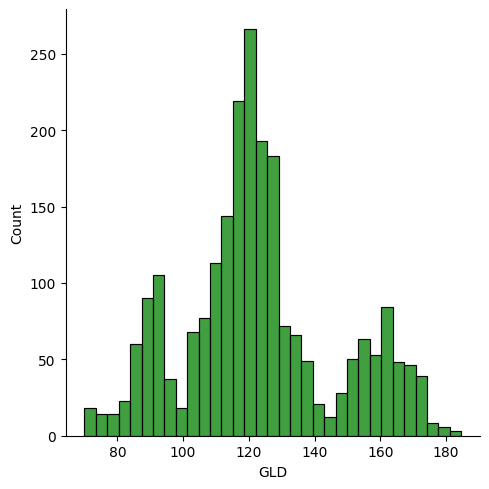

In [14]:
# checking distribution of gold price
sns.displot(data['GLD'],color='green')

In [15]:
# defining features and target values
X = data.drop(columns = ['Date','GLD'])
Y = data['GLD']

In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Random forest model

In [18]:
model = RandomForestRegressor(n_estimators = 100)

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
# model training
model.fit(X_train, Y_train)

RandomForestRegressor()

-- Model evaluation

In [22]:
# prediction on test data
test_model_prediction = model.predict(X_test)

In [23]:
print(test_model_prediction)

[168.25729922  81.61650002 115.97859992 127.63730097 120.70620124
 154.55939754 150.18049858 126.15940016 117.52889866 126.1186999
 116.66290102 171.52600083 141.80649906 168.0044987  115.05700003
 117.95180057 139.2928035  170.30870125 159.92210334 159.44829932
 155.19799993 125.26940047 176.76389962 157.06400376 125.23830081
  93.6281993   77.53300041 120.57750022 119.12359958 167.45619946
  88.04940029 125.29880007  91.16450079 117.65419999 121.19119949
 136.49360049 115.56320116 114.91710043 149.20960003 107.22590132
 104.3168024   87.18869785 126.55770064 118.14340018 153.67549944
 119.82100016 108.62459978 108.1547981   93.18380033 126.99759805
  75.06120011 113.57249946 121.33560001 111.16669924 118.97279901
 121.10089915 159.23850087 167.39490069 146.97219726  85.84729839
  94.37150021  86.74019865  90.5786     119.07430053 126.4711005
 127.69390035 169.75970019 122.36819952 117.54369896  98.6246002
 167.83950119 143.26549869 131.78250198 121.13670249 120.74069942
 119.6914005 

In [24]:
# R squared error
error_score = metrics.r2_score(Y_test, test_model_prediction)
print("R squared: ", error_score)

R squared:  0.9888428775727821


In [25]:
Y_test = list(Y_test)

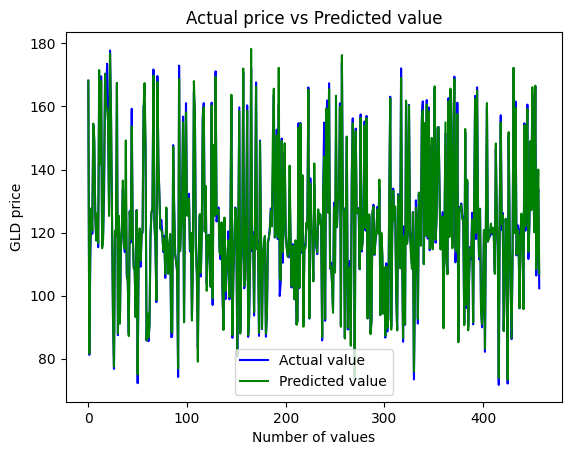

In [26]:
# visualizing values
plt.plot(Y_test, color='blue',label="Actual value")
plt.plot(test_model_prediction, color='green', label='Predicted value')
plt.title('Actual price vs Predicted value')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()
